<a href="https://colab.research.google.com/github/yc-chen10/112-yichentsai-thesis/blob/main/%E8%AB%96%E6%96%87%E6%8F%8F%E8%BF%B0%E7%B5%B1%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-05-28 11:35:04--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.16.102, 142.251.16.100, 142.251.16.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-05-28 11:35:05--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  81.2MB/s    in 0.2s    

2025-05-28 11:3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import math

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
judgemnt_df = pd.read_csv("/content/gdrive/MyDrive/NCHU/論文/酒駕資料/2016to22_判決結構化資料_清洗整理後_有序資料編碼修正後v2_含法官_含酒駕前案紀錄.csv", encoding="utf-8", index_col=0)

### 全台

In [ ]:
tw_df = judgemnt_df.copy()

In [ ]:
bins = [-float('inf'), 0.24, 0.49, 0.74, 0.99, 1.49, 1.99, 3.49, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8]  # 數值對應類別

# 假設 df 中有一個欄位名稱為 '呼氣酒精濃度'
tw_df['酒精濃度類別'] = pd.cut(tw_df['呼氣酒精濃度'], bins=bins, labels=labels, right=True).astype(int)

# 解析案號中的年份
#tw_df["年份"] = tw_df["案號"].apply(lambda x: int(x.split(",")[1]))

# 篩選 105 年以後的案件
#tw_df = tw_df[tw_df["年份"] >= 105]

# 移除無關欄位
tw_df = tw_df.drop(columns=["案號", "年份", "易科罰金", "併科罰金", "呼氣酒精濃度","法官","法院"])
# 移除有 NaN 的資料列
tw_df = tw_df.dropna()

In [ ]:
#刑期保留 2-6月就好
tw_df = tw_df[tw_df['刑期'] <= 6]
tw_df = tw_df[tw_df['刑期'] >= 2]

In [ ]:
len(tw_df)

29441

In [ ]:
tw_df.head()

,刑期,是否累犯,是否坦承犯行,有無出現交通事故,有無乘客,是否為職業駕駛,交通工具,家庭經濟,教育程度,除酒駕以外的交通違規,酒駕前案紀錄,酒精濃度類別
0,3,0,1,1,0,0,4,3,3,0,1.0,2
1,6,1,1,0,0,0,2,1,2,0,2.0,5
2,4,0,1,0,0,0,2,0,2,2,2.0,3
3,2,0,1,1,0,0,2,0,4,0,1.0,4
4,4,1,1,0,2,0,2,0,3,0,2.0,2


In [ ]:
tw_df['刑期'].value_counts()

,count
刑期,
2,9409
3,8676
4,5407
5,3207
6,2742


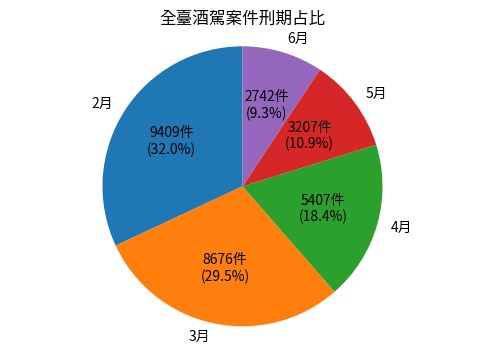

In [ ]:
import matplotlib.pyplot as plt

# 資料整理
count_series = tw_df['刑期'].value_counts().sort_index()
labels = [f"{x}月" for x in count_series.index]
counts = count_series.values
total = counts.sum()

# 自訂 autopct：顯示「xx件\nxx.x%」
def make_autopct(values):
    def my_autopct(pct):
        count = int(round(pct * total / 100.0))
        return f"{count}件\n({pct:.1f}%)"
    return my_autopct

# 畫圖
plt.figure(figsize=(6, 4))
plt.pie(
    counts,
    labels=labels,  # 外圈顯示：幾月
    autopct=make_autopct(counts),  # 圓內顯示：件數 + 百分比
    startangle=90,
    textprops={'fontsize': 10}
)
plt.title("全臺酒駕案件刑期占比")
plt.axis('equal')  # 保持圓形比例
plt.show()


酒精濃度類別

In [ ]:
tw_df['酒精濃度類別'].value_counts()

,count
酒精濃度類別,
2,15094
3,7796
4,4061
5,2169
6,210
1,99
7,7
8,5


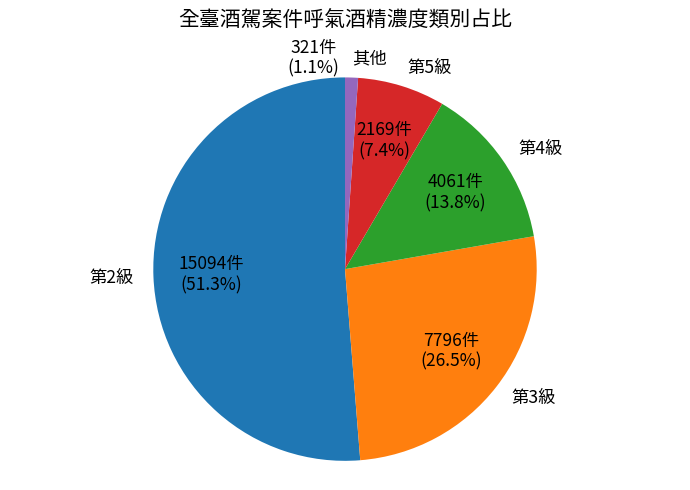

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 整理資料
count_series = tw_df['酒精濃度類別'].value_counts().sort_index()
total = count_series.sum()
threshold = 0.05

main_items = count_series[count_series / total >= threshold]
other_items = count_series[count_series / total < threshold]
combined = main_items.copy()
combined['其他'] = other_items.sum()

labels = [f"第{x}級" if x != '其他' else '其他' for x in combined.index]
counts = combined.values
explode = [0 for _ in labels]

# 畫圖
fig, ax = plt.subplots(figsize=(7, 5))
wedges, texts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    explode=explode,
    labeldistance=1.1,
    textprops={'fontsize': 12.5}
)

# 數字標籤
for i, (w, count) in enumerate(zip(wedges, counts)):
    angle = (w.theta2 + w.theta1) / 2.0
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))

    if labels[i] == '其他':
      r = 1.05
      x = x * r - 0.2   # ✅ 向左偏移
      y = y * r + 0.05  # 微上移
    else:
      r = 0.7
      x *= r
      y *= r


    ax.text(
        x, y,
        f"{count}件\n({count/total:.1%})",
        ha='center', va='center', fontsize=12.5
    )
#title size to 14

ax.set_title("全臺酒駕案件呼氣酒精濃度類別占比", pad=22.5, fontsize=15)
ax.axis('equal')
plt.tight_layout()
plt.show()


酒駕前案紀錄

In [ ]:
#酒駕前案紀錄
tw_df['酒駕前案紀錄'].value_counts()

,count
酒駕前案紀錄,
1.0,14102
0.0,8518
2.0,4475
3.0,1661
4.0,510
5.0,121
6.0,38
7.0,10
8.0,5


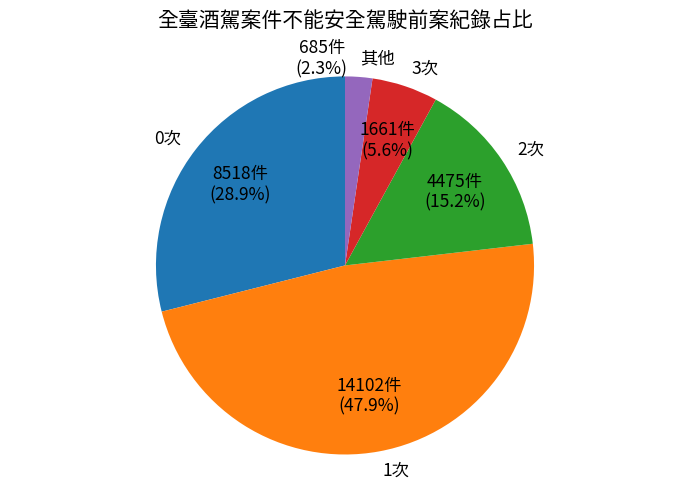

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 整理資料
count_series = tw_df['酒駕前案紀錄'].value_counts().sort_index()
total = count_series.sum()
threshold = 0.05

main_items = count_series[count_series / total >= threshold]
other_items = count_series[count_series / total < threshold]
combined = main_items.copy()
combined['其他'] = other_items.sum()

labels = [f"{int(x)}次" if x != '其他' else '其他' for x in combined.index]
counts = combined.values
explode = [0 for _ in labels]

# 畫圖
fig, ax = plt.subplots(figsize=(7, 5))
wedges, texts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    explode=explode,
    labeldistance=1.1,
    textprops={'fontsize': 12.5}
)

# 數字標籤
for i, (w, count) in enumerate(zip(wedges, counts)):
    angle = (w.theta2 + w.theta1) / 2.0
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))

    if labels[i] == '其他':
      r = 1.05
      x = x * r - 0.2   # ✅ 向左偏移
      y = y * r + 0.05  # 微上移
    else:
      r = 0.7
      x *= r
      y *= r


    ax.text(
        x, y,
        f"{count}件\n({count/total:.1%})",
        ha='center', va='center', fontsize=12.5
    )
#title size to 14

ax.set_title("全臺酒駕案件不能安全駕駛前案紀錄占比", pad=22.5, fontsize=15)
ax.axis('equal')
plt.tight_layout()
plt.show()


是否累犯

In [ ]:
#是否累犯

tw_df['是否累犯'].value_counts()

,count
是否累犯,
0,20616
1,8825


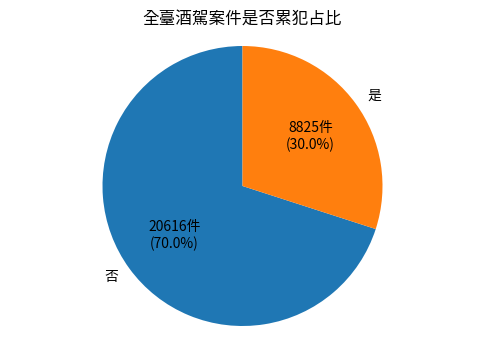

In [ ]:
import matplotlib.pyplot as plt

# 資料整理
count_series = tw_df['是否累犯'].value_counts().sort_index()
#labels = if x = 1為是, else為否

labels = ["是" if x == 1 else "否" for x in count_series.index]
counts = count_series.values
total = counts.sum()

# 自訂 autopct：顯示「xx件\nxx.x%」
def make_autopct(values):
    def my_autopct(pct):
        count = int(round(pct * total / 100.0))
        return f"{count}件\n({pct:.1f}%)"
    return my_autopct

# 畫圖
plt.figure(figsize=(6, 4))
plt.pie(
    counts,
    labels=labels,  # 外圈顯示：幾月
    autopct=make_autopct(counts),  # 圓內顯示：件數 + 百分比
    startangle=90,
    textprops={'fontsize': 10}
)
plt.title("全臺酒駕案件是否累犯占比")
plt.axis('equal')  # 保持圓形比例
plt.show()


是否坦承犯行

In [ ]:
#是否坦承犯行
tw_df['是否坦承犯行'].value_counts()

,count
是否坦承犯行,
1,27649
2,1053
0,739


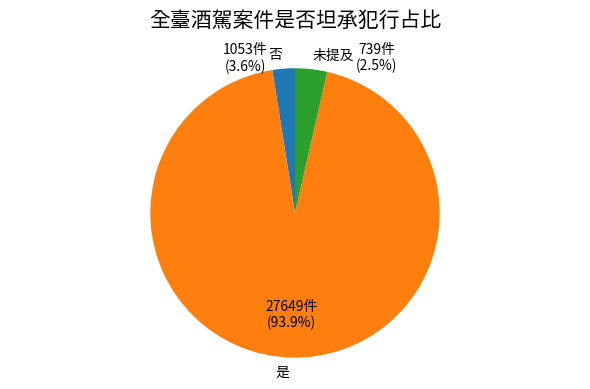

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 整理資料
count_series = tw_df['是否坦承犯行'].value_counts().sort_index()
labels = ["是" if x == 1 else "否" if x == 0 else "未提及" for x in count_series.index]
counts = count_series.values
total = counts.sum()

# 畫圖（不使用 autopct）
fig, ax = plt.subplots(figsize=(6, 4))
wedges, texts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    textprops={'fontsize': 10}
)

# 手動標記數字
for i, (w, count) in enumerate(zip(wedges, counts)):
    angle = (w.theta2 + w.theta1) / 2.0
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))

    # 大區塊正常，小區塊往外移並上下偏移
    if count / total < 0.05:
        r = 1.2
        x += 0.55 if labels[i] == "否" else -0.4
        y -= 0.1
    else:
        r = 0.7

    ax.text(
        x * r,
        y * r,
        f"{count}件\n({count/total:.1%})",
        ha='center',
        va='center',
        fontsize=10
    )

# 標題與格式
ax.set_title("全臺酒駕案件是否坦承犯行占比", pad=20, fontsize=15)
ax.axis('equal')
plt.tight_layout()
plt.show()


有無出現交通事故

In [ ]:
tw_df['有無出現交通事故'].value_counts()

,count
有無出現交通事故,
0,23982
1,4955
2,504


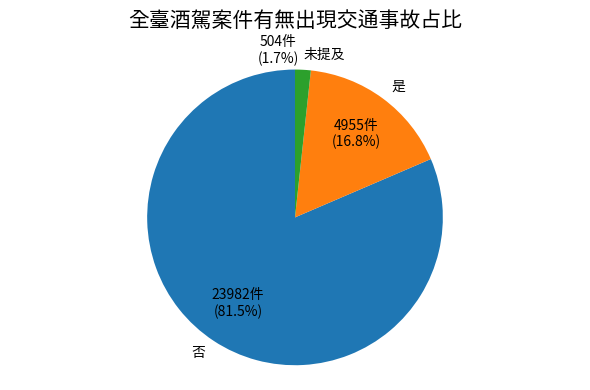

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 整理資料
count_series = tw_df['有無出現交通事故'].value_counts().sort_index()
labels = ["是" if x == 1 else "否" if x == 0 else "未提及" for x in count_series.index]
counts = count_series.values
total = counts.sum()

# 畫圖（不使用 autopct）
fig, ax = plt.subplots(figsize=(6, 4))
wedges, texts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    textprops={'fontsize': 10}
)

# 手動標記數字
for i, (w, count) in enumerate(zip(wedges, counts)):
    angle = (w.theta2 + w.theta1) / 2.0
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))

    # 大區塊正常，小區塊往外移並上下偏移
    if count / total < 0.05:
        r = 1.2
        y -= 0.06
        x -= 0.15
    else:
        r = 0.7

    ax.text(
        x * r,
        y * r,
        f"{count}件\n({count/total:.1%})",
        ha='center',
        va='center',
        fontsize=10
    )

# 標題與格式
ax.set_title("全臺酒駕案件有無出現交通事故占比", pad=20, fontsize=15)
ax.axis('equal')
plt.tight_layout()
plt.show()


有無乘客

In [ ]:
tw_df['有無乘客'].value_counts()

,count
有無乘客,
0,19017
2,9922
1,502


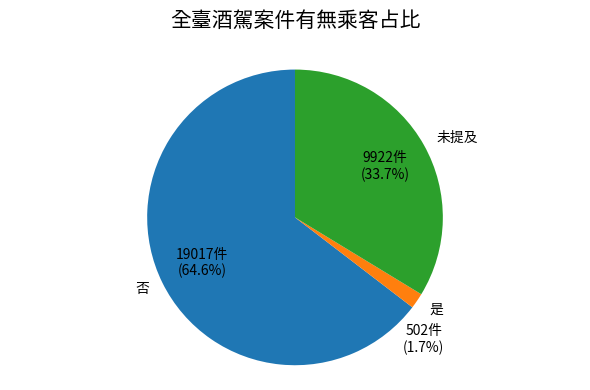

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 整理資料
count_series = tw_df['有無乘客'].value_counts().sort_index()
labels = ["是" if x == 1 else "否" if x == 0 else "未提及" for x in count_series.index]
counts = count_series.values
total = counts.sum()

# 畫圖（不使用 autopct）
fig, ax = plt.subplots(figsize=(6, 4))
wedges, texts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    textprops={'fontsize': 10}
)

# 手動標記數字
for i, (w, count) in enumerate(zip(wedges, counts)):
    angle = (w.theta2 + w.theta1) / 2.0
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))

    # 大區塊正常，小區塊往外移並上下偏移
    if count / total < 0.05:
        r = 1.2
        y -= 0.125
        x -= 0.1
    else:
        r = 0.7

    ax.text(
        x * r,
        y * r,
        f"{count}件\n({count/total:.1%})",
        ha='center',
        va='center',
        fontsize=10
    )

# 標題與格式
ax.set_title("全臺酒駕案件有無乘客占比", pad=20, fontsize=15)
ax.axis('equal')
plt.tight_layout()
plt.show()


是否為職業駕駛

In [ ]:
tw_df['是否為職業駕駛'].value_counts()

,count
是否為職業駕駛,
0,26780
2,2124
1,537


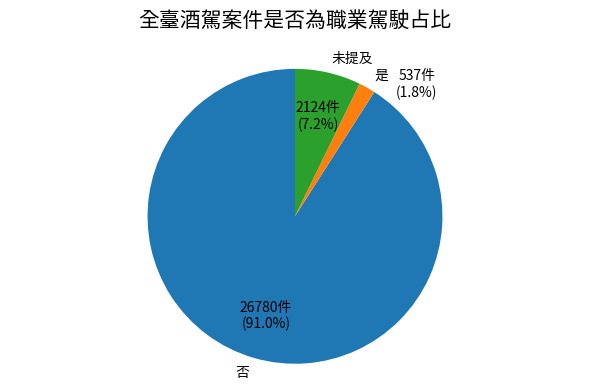

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 整理資料
count_series = tw_df['是否為職業駕駛'].value_counts().sort_index()
labels = ["是" if x == 1 else "否" if x == 0 else "未提及" for x in count_series.index]
counts = count_series.values
total = counts.sum()

# 畫圖（不使用 autopct）
fig, ax = plt.subplots(figsize=(6, 4))
wedges, texts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    textprops={'fontsize': 10}
)

# 手動標記數字
for i, (w, count) in enumerate(zip(wedges, counts)):
    angle = (w.theta2 + w.theta1) / 2.0
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))

    # 大區塊正常，小區塊往外移並上下偏移
    if count / total < 0.05:
        r = 1.2
        y -= 0.125
        x += 0.2
    else:
        r = 0.7

    ax.text(
        x * r,
        y * r,
        f"{count}件\n({count/total:.1%})",
        ha='center',
        va='center',
        fontsize=10
    )

# 標題與格式
ax.set_title("全臺酒駕案件是否為職業駕駛占比", pad=20, fontsize=15)
ax.axis('equal')
plt.tight_layout()
plt.show()


交通工具

In [ ]:
tw_df['交通工具'].value_counts()

,count
交通工具,
2,18808
4,7041
0,2831
1,655
5,86
3,20


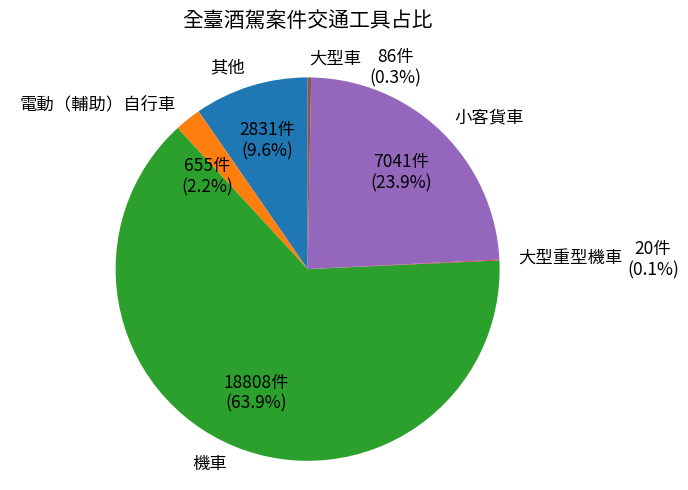

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 交通工具編碼對應名稱
vehicle_label_map = {
    0: '其他',
    1: '電動（輔助）自行車',
    2: '機車',
    3: '大型重型機車',
    4: '小客貨車',
    5: '大型車'
}

# 排序順序（依照車種規模）
vehicle_order = {
    '其他': 0,
    '電動（輔助）自行車': 1,
    '機車': 2,
    '大型重型機車': 3,
    '小客貨車': 4,
    '大型車': 5
}

# 整理資料
count_series = tw_df['交通工具'].value_counts().sort_index()
labels = [vehicle_label_map[x] for x in count_series.index]
counts = count_series.values
total = counts.sum()

# 依照指定順序排序
sorted_pairs = sorted(zip(labels, counts), key=lambda x: vehicle_order[x[0]])
labels, counts = zip(*sorted_pairs)

# 畫圖
fig, ax = plt.subplots(figsize=(7, 5))
wedges, texts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    labeldistance=1.1,
    textprops={'fontsize': 12.5}
)

# 數字標籤
for i, (w, count) in enumerate(zip(wedges, counts)):
    angle = (w.theta2 + w.theta1) / 2.0
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))

    # 如果是其他，就往左上偏移一點
    if labels[i] == '電動（輔助）自行車':
      r = 0.7
      x += 0.1
      y -= 0.3
    elif labels[i] == '大型車':
      r = 0.7
      x += 0.45
      y += 0.05
    elif labels[i] == '大型重型機車':
      r = 0.7
      x += 0.8
    else:
      r = 0.7
      x *= r
      y *= r

    ax.text(
        x, y,
        f"{count}件\n({count/total:.1%})",
        ha='center', va='center', fontsize=12.5
    )

# 圖標題
ax.set_title("全臺酒駕案件交通工具占比", pad=22.5, fontsize=15)
ax.axis('equal')
plt.tight_layout()
plt.show()


家庭經濟

In [ ]:
tw_df['家庭經濟'].value_counts()

,count
家庭經濟,
0,10699
2,10358
3,5410
1,2974


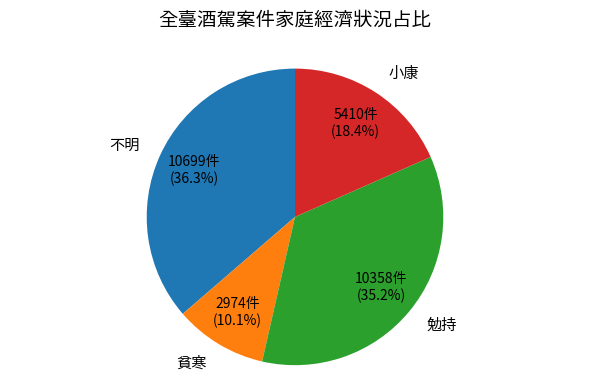

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 對應標籤
econ_label_map = {
    0: '不明',
    1: '貧寒',
    2: '勉持',
    3: '小康'
}

# 指定排序順序
order = [0, 1, 2, 3]

# 資料整理
count_series = tw_df['家庭經濟'].value_counts().to_dict()
labels = [econ_label_map[i] for i in order]
counts = [count_series.get(i, 0) for i in order]  # 若某類不存在則補 0
total = sum(counts)

# 畫圖
fig, ax = plt.subplots(figsize=(6, 4))
wedges, texts = ax.pie(
    counts,
    labels=labels,
    startangle=90,
    labeldistance=1.15,
    textprops={'fontsize': 11}
)

# 數字標籤（件數 + 百分比）
for i, (w, count) in enumerate(zip(wedges, counts)):
    angle = (w.theta2 + w.theta1) / 2.0
    x = 0.75 * np.cos(np.deg2rad(angle))
    y = 0.75 * np.sin(np.deg2rad(angle))
    ax.text(
        x, y,
        f"{count}件\n({count/total:.1%})",
        ha='center', va='center',
        fontsize=10
    )

# 標題與格式
ax.set_title("全臺酒駕案件家庭經濟狀況占比", fontsize=14, pad=20)
ax.axis('equal')
plt.tight_layout()
plt.show()


教育程度

In [ ]:
tw_df['教育程度'].value_counts()

,count
教育程度,
0,9592
3,9214
2,6017
1,1721
5,1373
4,1342
6,182


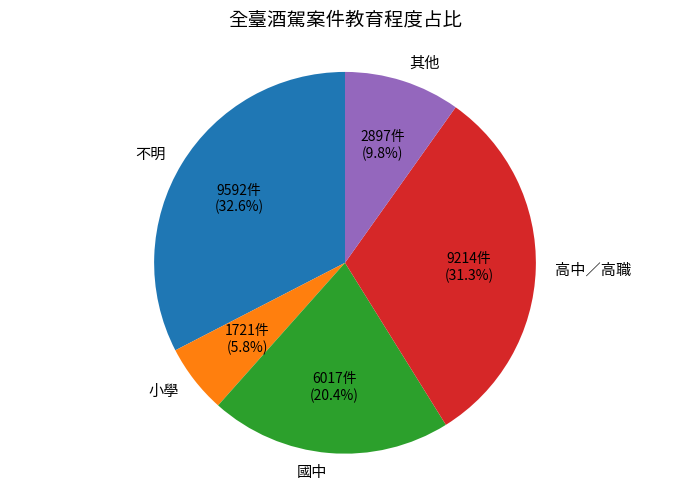

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 教育程度對應標籤
edu_label_map = {
    0: '不明',
    1: '小學',
    2: '國中',
    3: '高中／高職',
    4: '大專／專科',
    5: '大學',
    6: '碩士及以上'
}

# 教育順序
order = [0, 1, 2, 3, 4, 5, 6]
count_series = tw_df['教育程度'].value_counts().to_dict()
labels_full = [edu_label_map[i] for i in order]
counts_full = [count_series.get(i, 0) for i in order]
total = sum(counts_full)

# ✅ 設定最小比例門檻（<5% 視為太小）
threshold = 0.05

# 過濾與合併「其他」
filtered_labels = []
filtered_counts = []
other_count = 0

for label, count in zip(labels_full, counts_full):
    if count / total >= threshold:
        filtered_labels.append(label)
        filtered_counts.append(count)
    else:
        other_count += count

# 加入「其他」類別（若有）
if other_count > 0:
    filtered_labels.append("其他")
    filtered_counts.append(other_count)

# ✅ 畫圖
fig, ax = plt.subplots(figsize=(7, 5))
wedges, _ = ax.pie(
    filtered_counts,
    startangle=90,
    radius=1,
    textprops={'fontsize': 11}
)

for i, (w, count) in enumerate(zip(wedges, filtered_counts)):
    angle = (w.theta2 + w.theta1) / 2.0
    rad = np.deg2rad(angle)
    x = np.cos(rad)
    y = np.sin(rad)

    # 圓內數字標籤
    ax.text(
        x * 0.65, y * 0.65,
        f"{count}件\n({count/total:.1%})",
        ha='center', va='center',
        fontsize=10
    )

    # 外圈標籤
    label_x = x * 1.1
    label_y = y * 1.1
    ha_align = 'left' if x >= 0 else 'right'

    ax.text(
        label_x, label_y,
        filtered_labels[i],
        ha=ha_align, va='center', fontsize=11
    )

# 標題與格式
ax.set_title("全臺酒駕案件教育程度占比", fontsize=14, pad=20)
ax.axis('equal')
plt.tight_layout()
plt.show()


除酒駕以外的交通違規

In [ ]:
tw_df['除酒駕以外的交通違規'].value_counts()

,count
除酒駕以外的交通違規,
0,26115
3,1302
1,1186
2,838


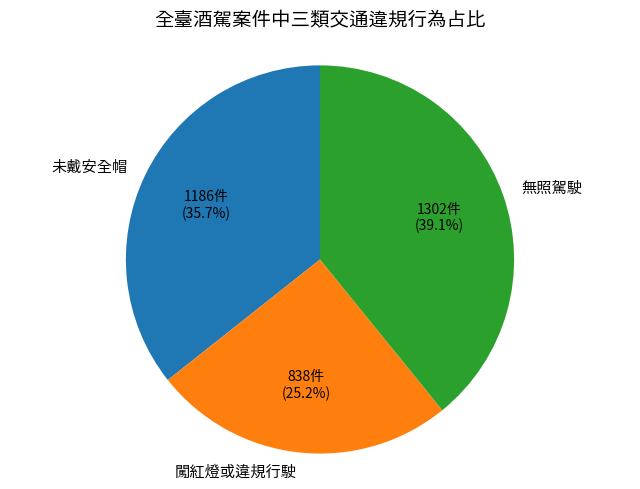

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 違規類型對應標籤
violation_label_map = {
    1: '未戴安全帽',
    2: '闖紅燈或違規行駛',
    3: '無照駕駛'
}

# 指定順序
order = [1, 2, 3]
count_series = {
    1: 1186,
    2: 838,
    3: 1302
}
labels = [violation_label_map[i] for i in order]
counts = [count_series[i] for i in order]
total = sum(counts)

# 畫圖
fig, ax = plt.subplots(figsize=(6.5, 5))
wedges, _ = ax.pie(
    counts,
    startangle=90,
    radius=1,
    textprops={'fontsize': 11}
)

for i, (w, count) in enumerate(zip(wedges, counts)):
    angle = (w.theta2 + w.theta1) / 2.0
    rad = np.deg2rad(angle)
    x = np.cos(rad)
    y = np.sin(rad)

    # 圓內數字標籤
    ax.text(
        x * 0.65, y * 0.65,
        f"{count}件\n({count/total:.1%})",
        ha='center', va='center',
        fontsize=10
    )

    # 外圈標籤（違規類型名稱）
    label_x = x * 1.1
    label_y = y * 1.1
    ha_align = 'left' if x >= 0 else 'right'

    ax.text(
        label_x, label_y,
        labels[i],
        ha=ha_align,
        va='center',
        fontsize=11
    )

# 標題與格式
ax.set_title("全臺酒駕案件中三類交通違規行為占比", fontsize=14, pad=15)
ax.axis('equal')
plt.tight_layout()
plt.show()


### 法院

In [ ]:
court_df = judgemnt_df.copy()

In [ ]:
bins = [-float('inf'), 0.24, 0.49, 0.74, 0.99, 1.49, 1.99, 3.49, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8]  # 數值對應類別

# 假設 df 中有一個欄位名稱為 '呼氣酒精濃度'
court_df['酒精濃度類別'] = pd.cut(court_df['呼氣酒精濃度'], bins=bins, labels=labels, right=True).astype(int)

# 移除無關欄位
court_df = court_df.drop(columns=["案號", "年份", "易科罰金", "併科罰金", "呼氣酒精濃度"])
# 移除有 NaN 的資料列
court_df = court_df.dropna()

In [ ]:
#刑期保留 2-6月就好
court_df = court_df[court_df['刑期'] <= 6]
court_df = court_df[court_df['刑期'] >= 2]

In [ ]:
court_df['法院'].value_counts()

,count
法院,
KSDM,6950
TYDM,3060
PTDM,2628
CTDM,2559
TCDM,2476
TNDM,1821
TPDM,1581
PCDM,920
CHDM,906


In [ ]:
court_df['法院'].head()

,法院
0,CHDM
1,CHDM
2,CHDM
3,CPEM
4,CPEM


法官

In [ ]:
judge_df = judgemnt_df.copy()

In [ ]:

# >100才顯示
judge_case_more_than_100_df = judge_df['法官'].value_counts()[judge_df['法官'].value_counts() > 100]

judge_case_more_than_100_df

,count
法官,
鄭琬薇,675
張嘉芬,559
許瑜容,437
楊博欽,435
涂裕洪,387
蔡書瑜,363
蔡英雌,361
黎錦福,343
呂佩珊,331


In [ ]:
#用judge_df的法官法院 找出 judge_case_more_than_100_df的法官對應的法院
#欄位['法院','法官','counts']
judge_case_more_than_100_df = judge_df[judge_df['法官'].isin(judge_case_more_than_100_df.index)]
judge_case_more_than_100_df = judge_case_more_than_100_df[['法官','法院']]
judge_case_more_than_100_df = judge_case_more_than_100_df.groupby(['法官','法院']).size().reset_index(name='counts')
#judge_case_more_than_100_df = judge_case_more_than_100_df[judge_case_more_than_100_df['count']>100]

#counts>100
judge_case_more_than_100_df = judge_case_more_than_100_df[judge_case_more_than_100_df['counts']>=100]
judge_case_more_than_100_df


,法官,法院,counts
0,傅曉瑄,CPEM,249
2,劉容妤,PTDM,206
3,吳俞玲,KSDM,281
4,呂佩珊,KSDM,331
5,呂明燕,KSDM,185
6,孫于淦,NTDM,135
7,巫淑芳,FYEM,124
9,廖華君,CTDM,270
10,張佐榕,CYDM,149
11,張俊文,CTDM,287


In [ ]:
judge_case_more_than_100_df['法院'].value_counts()
#

,count
法院,
KSDM,25
TYDM,9
CTDM,6
PTDM,6
TNDM,5
TCDM,3
CHDM,2
CYDM,2
SLEM,2
